In [1]:
import numpy as np
import math
from collections import Counter
import cv2
import matplotlib.pyplot as plt

In [2]:
# to convert the image from RGB to XYZ

def rgb2xyz(RGB):
    
    # matrix for RGB2XYZ
    Trans =np.array([[0.490, 0.310, 0.200], 
                     [0.177, 0.813, 0.011], 
                     [0.000, 0.010, 0.990]])
    # to transform RGB to XYZ
    XYZ = np.dot(Trans, (np.transpose(RGB)))/255
    
    return XYZ

In [3]:
# to convert the image from XYZ to L*a*b*

def xyz2lab(XYZ):
    
    # to separate X, Y and Z
    X = XYZ[0]
    Y = XYZ[1]
    Z = XYZ[2]
    # to set the value of Xn, Yn and Zn
    Xn = 0.9642
    Yn = 1.0000
    Zn = 0.8252
    # to compute the franctions and the powers
    X = pow((X/Xn), (1/3))
    Y = pow((Y/Yn), (1/3))
    Z = pow((Z/Zn), (1/3))
    #to transform XYZ to Lab
    L = 116 * Y - 16
    a = 500 * (X - Y)
    b = 200 * (Y - Z)
    Lab = (L, a, b)
    
    return Lab

In [4]:
# to convert the image from RGB to L*a*b*
def rgb2lab(pixel):
    
    RGB = (pixel[0],pixel[1],pixel[2])
    XYZ = rgb2xyz(RGB)
    Lab = xyz2lab(XYZ)
            
    return Lab

>>The result of Mission A.


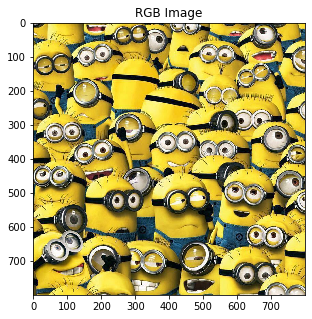

In [5]:
# to read the image
img = cv2.imread("minions.jpg")

# to convert the image from BGR to RGB
# using the function directly since there is no requirement to realize it by myself
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# to display the image
fig1 = plt.figure(figsize=(5, 5))
ax = fig1.add_subplot(111, title='RGB Image')
plt.imshow(rgb)
print('>>The result of Mission A.')

The output from the function in OpenCV.


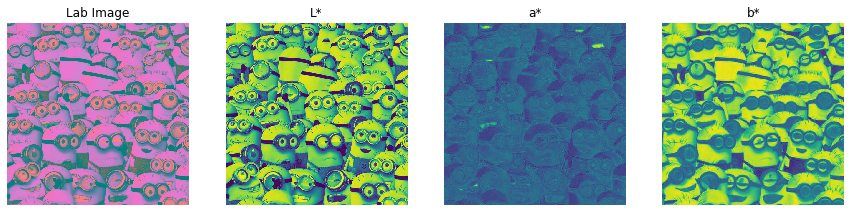

In [6]:
# to convert the image from RGB to L*a*b*

img = rgb
# the output from the function in OpenCV
lab_f = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

# to display the L*a*b* image porcessed by funtion in OpenCV and its each component (L,a,b)
fig2 = plt.figure(figsize=(15, 15))

ax = fig2.add_subplot(141, title='Lab Image')
plt.imshow(lab_f)
plt.axis('off')

ax = fig2.add_subplot(142, title='L*')
plt.imshow(lab_f[:,:,0])
plt.axis('off')

ax = fig2.add_subplot(143, title='a*')
plt.imshow(lab_f[:,:,1])
plt.axis('off')

ax = fig2.add_subplot(144, title='b*')
plt.imshow(lab_f[:,:,2])
plt.axis('off')

print('The output from the function in OpenCV.')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The output from the function I wrote.


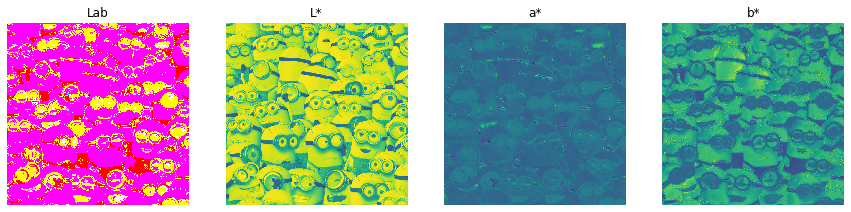

In [7]:
# the output from the function I wrote
w = img.shape[0]
h = img.shape[1]
lab = np.zeros((w,h,3))
for i in range(w):
    for j in range(h):
        Lab = rgb2lab(img[i,j])
        lab[i, j] = (Lab[0], Lab[1], Lab[2])

# to display the L*a*b* image porcessed by funtion I wrote and its each component (L,a,b)
fig3 = plt.figure(figsize=(15, 15))

ax = fig3.add_subplot(141, title='Lab')
plt.imshow(lab)
plt.axis('off')

ax = fig3.add_subplot(142, title='L*')
plt.imshow(lab[:,:,0])
plt.axis('off')

ax = fig3.add_subplot(143, title='a*')
plt.imshow(lab[:,:,1])
plt.axis('off')

ax = fig3.add_subplot(144, title='b*')
plt.imshow(lab[:,:,2])
plt.axis('off')

print('The output from the function I wrote.')

In [8]:
print('# I think the different outputs of function in OpenCV and the one I wrote is caused by the usage of different transformation matrices.')

# I think the different outputs of function in OpenCV and the one I wrote is caused by the usage of different transformation matrices.


>>The result of Mission B.


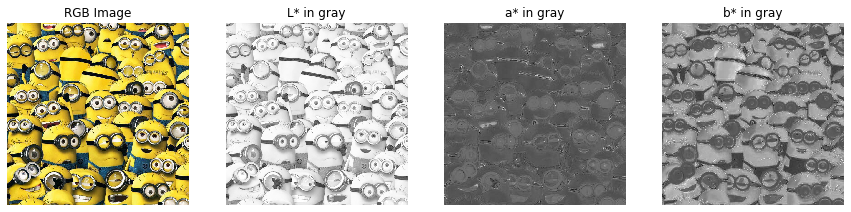

In [9]:
# to display the RGB image as well as each component (L,a,b) of the L*a*b* image as an grey level image
fig4 = plt.figure(figsize=(15, 15))

ax = fig4.add_subplot(141, title='RGB Image')
plt.imshow(rgb)
plt.axis('off')

ax = fig4.add_subplot(142, title='L* in gray')
plt.imshow(lab[:,:,0], cmap='gray')
plt.axis('off')

ax = fig4.add_subplot(143, title='a* in gray')
plt.imshow(lab[:,:,1], cmap='gray')
plt.axis('off')

ax = fig4.add_subplot(144, title='b* in gray')
plt.imshow(lab[:,:,2], cmap='gray')
plt.axis('off')

print('>>The result of Mission B.')

In [10]:
# to compute the ranges of 3 channels of both
max_f_L = lab_f[:,:,0].max()
min_f_L = lab_f[:,:,0].min()
max_f_a = lab_f[:,:,1].max()
min_f_a = lab_f[:,:,1].min()
max_f_b = lab_f[:,:,2].max()
min_f_b = lab_f[:,:,2].min()

max_L = lab[:,:,0].max()
min_L = lab[:,:,0].min()
max_a = lab[:,:,1].max()
min_a = lab[:,:,1].min()
max_b = lab[:,:,2].max()
min_b = lab[:,:,2].min()

print('The maximum of each channel of the image processed by OpenCV is:')
print('L* = ', max_f_L, '; a* = ', max_f_a, '; b* = ', max_f_b, '\n')
print('The minimum of each channel of the image processed by OpenCV is:')
print('L* = ', min_f_L, '; a* = ', min_f_a, '; b* = ', min_f_b, '\n')
print('The maximum of each channel of the image processed by my funtion is:')
print('L* = ', max_L, '; a* = ', max_a, '; b* = ', max_b, '\n')
print('The minimum of each channel of the image processed by my funtion is:')
print('L* = ', min_L, '; a* = ', min_a, '; b* = ', min_b, '\n')
print('# I think the difference is caused by the usage of different transformation matrices.')

The maximum of each channel of the image processed by OpenCV is:
L* =  255 ; a* =  189 ; b* =  215 

The minimum of each channel of the image processed by OpenCV is:
L* =  0 ; a* =  96 ; b* =  84 

The maximum of each channel of the image processed by my funtion is:
L* =  100.03865378493349 ; a* =  95.31450571963961 ; b* =  140.95382223555228 

The minimum of each channel of the image processed by my funtion is:
L* =  -16.0 ; a* =  -62.78537677333876 ; b* =  -86.67800053290003 

# I think the difference is caused by the usage of different transformation matrices.


L* after Gaussian Filter Processed by Function in OpenCV


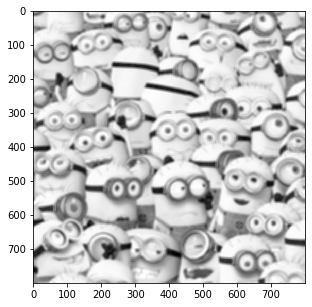

In [11]:
# to display the output after Gaussian Filter processed by functions in OpenCV
from scipy import signal
from scipy import misc
img_L = lab[:,:,0]
GF_f_L = cv2.GaussianBlur(img_L,(9,9),200)
fig5 = plt.figure(figsize=(5, 5))
ax = fig5.add_subplot(111)
plt.imshow(GF_f_L, cmap='gray')
print ('L* after Gaussian Filter Processed by Function in OpenCV')

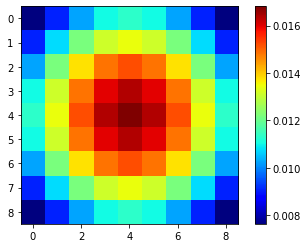

L* after Gaussian Filter Processed by My Programme


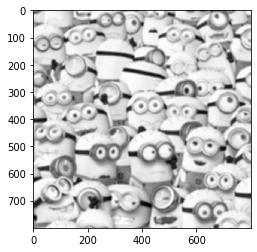

In [12]:
# 9*9 Gassian Filter
theta = 4.5
x, y = np.mgrid[-4:5, -4:5]
deno = 2 * math.pi * np.power(theta,2)
index = -(x*x + y*y)/(2*theta*theta)
GF = deno * np.exp(index)

# normalization
GF = GF / GF.sum()

# to show the color-bar image
plt.imshow(GF, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

# convolution
GF_L = signal.convolve2d(img_L, GF, boundary='symm', mode='same')

#t to display the output after Gaussian Filter
plt.imshow(GF_L, cmap='gray')
print ('L* after Gaussian Filter Processed by My Programme')

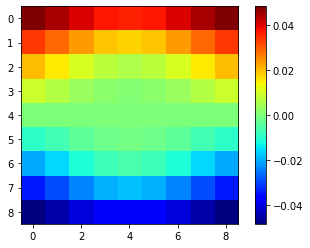

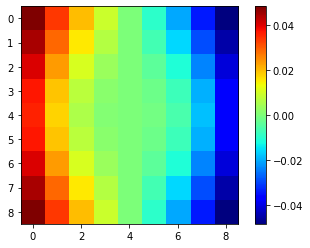

L* after spacial derivatives of Gaussian Filter Processed by My Programme


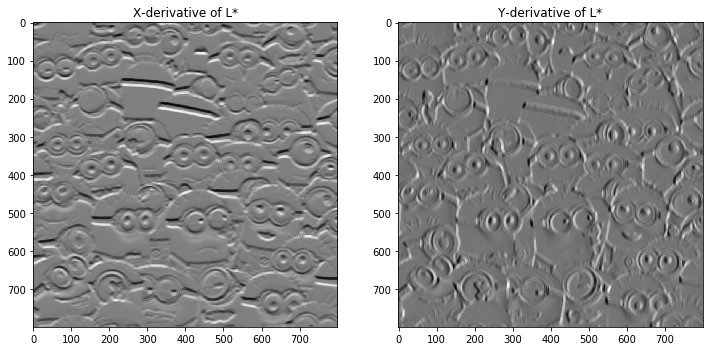

In [13]:
# the partial derivative of x-direction of Gaussian filter
GF_x = (-1)  * GF * (x*x + y*y) * x / (theta*theta)
GF_y = (-1)  * GF * (x*x + y*y) * y / (theta*theta)

# convolution
GF_L_x = signal.convolve2d(img_L, GF_x, boundary='symm', mode='same')
GF_L_y = signal.convolve2d(img_L, GF_y, boundary='symm', mode='same')

# to show the color-bar image in x-direction
plt.imshow(GF_x, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

# to show the color-bar image in y-direction
plt.imshow(GF_y, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

fig6 = plt.figure(figsize=(12, 12))
#t to display the output in x-direction
ax = fig6.add_subplot(121, title='X-derivative of L*')
plt.imshow(GF_L_x, cmap='gray')
#t to display the output in y-direction
ax = fig6.add_subplot(122, title='Y-derivative of L*')
plt.imshow(GF_L_y, cmap='gray')
print ('L* after spacial derivatives of Gaussian Filter Processed by My Programme')

>>The result of Mission C.


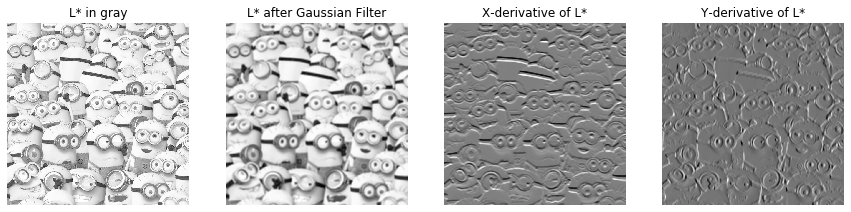

In [14]:
# to display the result of mission c
fig7 = plt.figure(figsize=(15, 15))

ax = fig7.add_subplot(141, title='L* in gray')
plt.imshow(img_L, cmap='gray')
plt.axis('off')

ax = fig7.add_subplot(142, title='L* after Gaussian Filter')
plt.imshow(GF_L, cmap='gray')
plt.axis('off')

ax = fig7.add_subplot(143, title='X-derivative of L*')
plt.imshow(GF_L_x, cmap='gray')
plt.axis('off')

ax = fig7.add_subplot(144, title='Y-derivative of L*')
plt.imshow(GF_L_y, cmap='gray')
plt.axis('off')

print('>>The result of Mission C.')

In [15]:
# to compute the range of channel a* and b*
img_a = lab[:,:,1]
img_b = lab[:,:,2]

print('The maximum and minimum of channel a* is:')
print('MAX a* = ', max_a, '; MIN a* = ', min_a, '\n')
print('The maximum and minimum of channel b* is:')
print('MAX b* = ', max_b, '; MIN b* = ', min_b, '\n')

The maximum and minimum of channel a* is:
MAX a* =  95.31450571963961 ; MIN a* =  -62.78537677333876 

The maximum and minimum of channel b* is:
MAX b* =  140.95382223555228 ; MIN b* =  -86.67800053290003 



1D-Histograms of both channel a* and b*


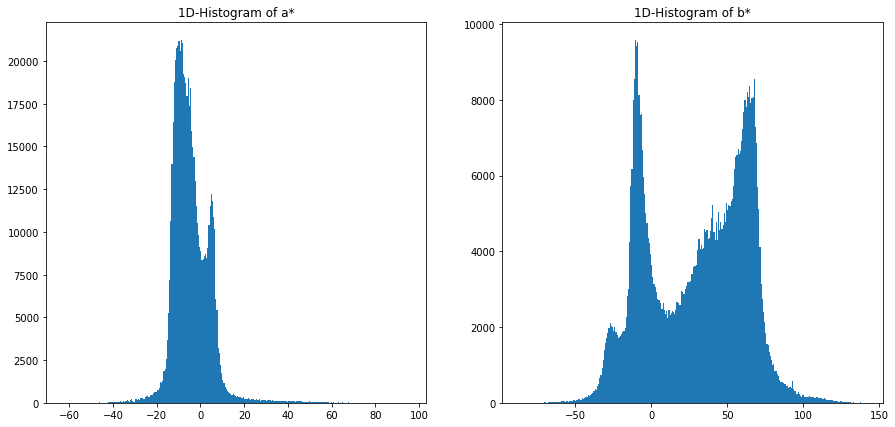

In [16]:
# to dispaly the 1D histograms of channel a* and b* respectively
fig8 = plt.figure(figsize=(15, 7))
ax = fig8.add_subplot(121, title='1D-Histogram of a*')
plt.hist(img_a.ravel(), 300)
ax = fig8.add_subplot(122, title='1D-Histogram of b*')
plt.hist(img_b.ravel(), 300)
print ('1D-Histograms of both channel a* and b*')

>>The result of Mission D.


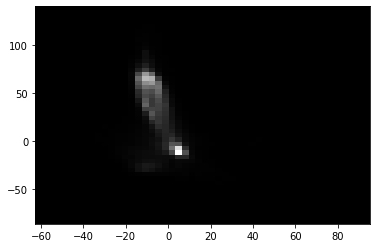

In [17]:
# to dispaly the 2D histograms of channel a* & b*
H, xedges, yedges = np.histogram2d(img_a.ravel(),img_b.ravel(),bins=50)
H = H.T
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, H, cmap='gray')
print('>>The result of Mission D.')

In [18]:
# to open a part of the origin image
cut = cv2.imread("yellow.jpg")
cut = cv2.cvtColor(cut, cv2.COLOR_BGR2RGB)
cut_lab = cv2.cvtColor(cut, cv2.COLOR_RGB2Lab)

In [19]:
# to compute and display the ratio of the model(hq) and target(ht) histograms
# I(x,y) = img = I, I'(x,y) = hr = I1
Ht = cv2.calcHist([lab_f],[1,2], None, [256,256], [0,256,0,256] )
Hq = cv2.calcHist([cut_lab],[1,2], None, [256,256], [0,256,0,256] )
Hr = Hq/Ht

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


The size of ratio is (256, 256)


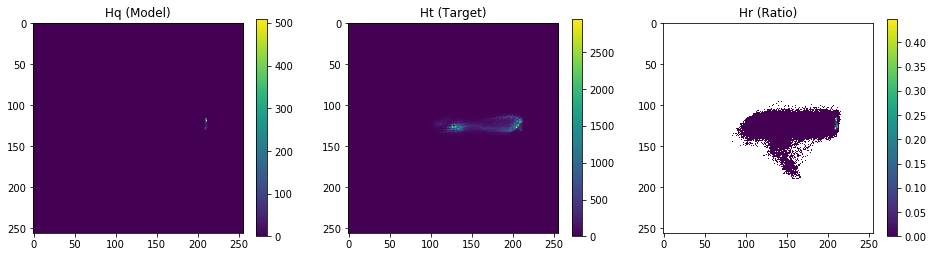

In [20]:
fig9 = plt.figure(figsize=(16, 4))

ax = fig9.add_subplot(131, title='Hq (Model)')
plt.imshow(Hq)
plt.colorbar()
ax = fig9.add_subplot(132, title='Ht (Target)')
plt.imshow(Ht)
plt.colorbar()
ax = fig9.add_subplot(133, title='Hr (Ratio)')
plt.imshow(Hr)
plt.colorbar()
print('The size of ratio is', Hr.shape)

# It can be seen that the yellow part is the peak, which reveals the location of the detected model Hq.


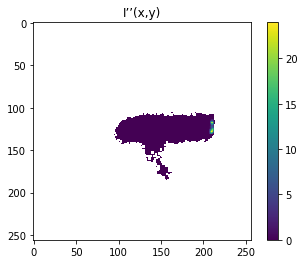

In [21]:
# I''(x,y) = convolution = I2
# 3*3 Gassian Filter
theta = 1.5
x, y = np.mgrid[-1:2, -1:2]
deno = 2 * math.pi * np.power(theta,2)
index = -(x*x + y*y)/(2*theta*theta)
GF3 = deno * np.exp(index)
I2 = signal.convolve2d(Hr, GF3, boundary='symm', mode='same')
plt.imshow(I2)
plt.title('I’’(x,y)')
plt.colorbar()
print('# It can be seen that the yellow part is the peak, which reveals the location of the detected model Hq.')

>>The result of Mission E.


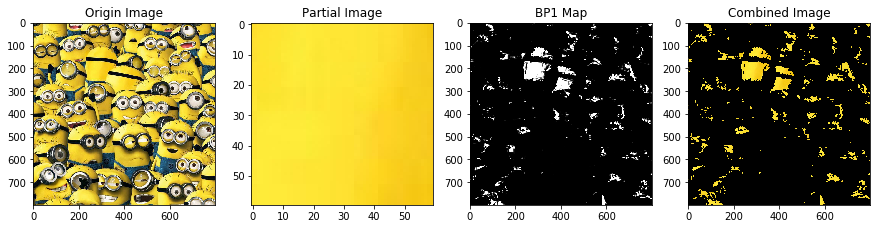

In [22]:
# to normalize histogram and apply backprojection
cv2.normalize(Hq,Hq,0,255,cv2.NORM_MINMAX)
B = cv2.calcBackProject([lab_f],[1,2],Hq,[0,256,0,256],1)

# to apply a convolution with a circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(B, -1, disc, B)

# to use thresholding to segment out the region
ret,thresh = cv2.threshold(B,10,255,0)

# to overlay images using bitwise_and
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(img,thresh)

# to display the output
fig10 = plt.figure(figsize=(15, 15))
ax = fig10.add_subplot(141, title='Origin Image')
plt.imshow(img)
ax = fig10.add_subplot(142, title='Partial Image')
plt.imshow(cut)
ax = fig10.add_subplot(143, title='BP1 Map')
plt.imshow(B, cmap='gray')
ax = fig10.add_subplot(144, title='Combined Image')
plt.imshow(res)
print('>>The result of Mission E.')

1D-Histograms of channel L*
The latter one is more convenient to calculate the sum of levels.


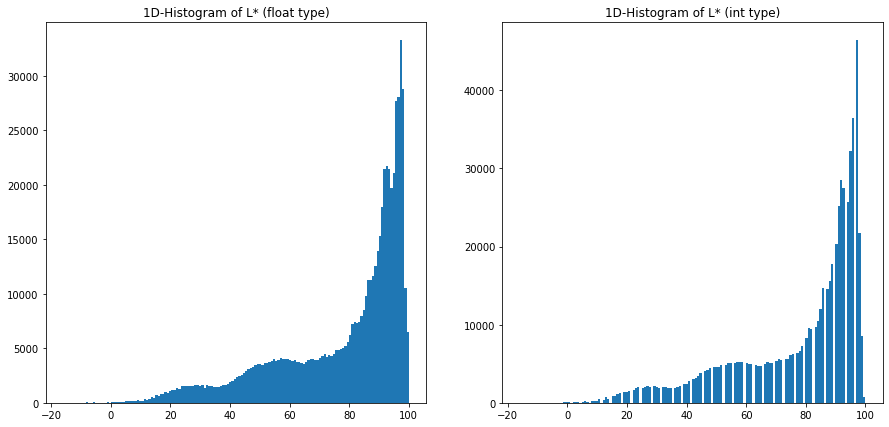

In [23]:
# to dispaly the 1D histograms of channel L*
L = img_L.astype('int')
fig11 = plt.figure(figsize=(15,7))
ax = fig11.add_subplot(121, title='1D-Histogram of L* (float type)')
plt.hist(img_L.ravel(), 150)
ax = fig11.add_subplot(122, title='1D-Histogram of L* (int type)')
plt.hist(L.ravel(), 150)
print('1D-Histograms of channel L*')
print('The latter one is more convenient to calculate the sum of levels.')

In [24]:
# to calculate the sum and range of intensities of the channel L*
a = np.array(L)
unique, counts = np.unique(a, return_counts=True)
sum_dict = dict(zip(unique, counts))
sum_int = len(sum_dict)
max_int = max(sum_dict)
min_int = min(sum_dict)
len_int = max_int - min_int
print('The sum of intensities is',sum_int,'\nThe range of them is [',max_int,',', min_int, ']\nThe length of them is',len_int)

The sum of intensities is 112 
The range of them is [ 100 , -16 ]
The length of them is 116


In [25]:
# to adjust the minimum of image to 0
L = L + 16

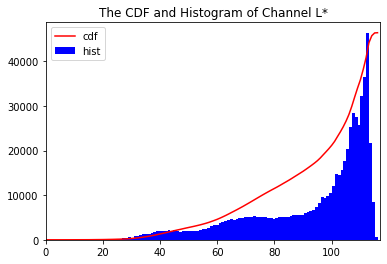

In [26]:
# to display the cdf and hist of channel L*
hist, bins = np.histogram(L.ravel(), 117, [0,117])
cdf = hist.cumsum()
cdf_nmlz = cdf*float(hist.max())/cdf.max()
plt.plot(cdf_nmlz,color = 'r')
plt.hist(L.ravel(),117,color = 'b')
plt.xlim([0,117])
plt.legend(('cdf','hist'), loc = 'upper left')
plt.title('The CDF and Histogram of Channel L*')
plt.show()

In [27]:
cdf1 = (cdf-cdf[0]) *256/ (cdf[-1]-1)
cdf1 = cdf1.astype(np.uint8)
L2 = cdf1[L]

>>The result of Mission F.


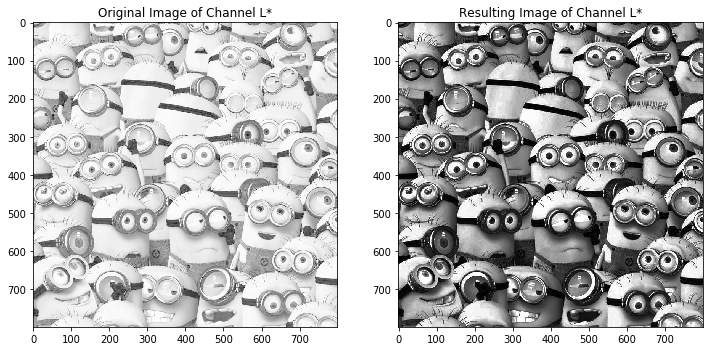

In [29]:
fig12 = plt.figure(figsize=(12, 12))
ax = fig12.add_subplot(121, title='Original Image of Channel L*')
plt.imshow(L, cmap='gray')
ax = fig12.add_subplot(122, title='Resulting Image of Channel L*')
plt.imshow(L2, cmap='gray')
print('>>The result of Mission F.')